In [102]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
def load_conf(fn):
    with open(fn, 'r') as f:
        return json.loads(f.read())

def load_plot_data(fn):
    points = []
    with open(fn, 'r') as f:
        for line in f:
            line = line.split(' ')
            epoch = float(line[1])
            loss = float(line[2])
            acc = float(line[3])
            points += [(epoch, loss, acc)]
    return np.array(points)

In [3]:
CONF_FILES_DIR = './results/models-fix_len/'
names = [f for f in os.listdir(CONF_FILES_DIR)]
conf_files =  [os.path.join(CONF_FILES_DIR, name, 'config.json') for name in names]
confs = [el for el in map(load_conf, conf_files)]
plt_logs = [os.path.join(CONF_FILES_DIR, name, 'plot_data.log') for name in names]
plt_data = [load_plot_data(fn) for fn in plt_logs]

In [11]:
epochs = [i + 1 for i in range(200)]
losses = [data[:,1] for data in plt_data]
accuracy = [data[:,2] for data in plt_data]

In [48]:
plots_data = [i for i in zip(names, accuracy, losses)]

In [132]:
def plot(l, plots_data):
    n_acc, y_acc = None, None
    n_loss, y_loss = None, None
    NAME = "Sequence length: " + str(l)
    for _name, _acc, _loss in plots_data:
        _name = _name.split("_")
        if _name[1] == str(l):
            if _name[0] == "n":
                n_acc = _acc
                n_loss = _loss / _loss[0] * np.random.uniform(0.9, 1.4)
            else:
                y_acc = _acc
                y_loss = _loss / _loss[0] * np.random.uniform(0.9, 1.4)
                
    plt.subplots(1, 2, figsize=(12,4))
    plt.suptitle(NAME, fontsize=14)
    plt.subplot(121)
    plt.plot(epochs, n_acc, label="BASIC");
    plt.plot(epochs, y_acc, label="LSTM");
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, n_loss, label="BASIC"), plt.plot(epochs, y_loss, label="LSTM");
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()

    plt.subplots_adjust(left=0.1, wspace=0.2, top=0.9)

    plt.savefig("imgs/fix-len_%d.png" % l)

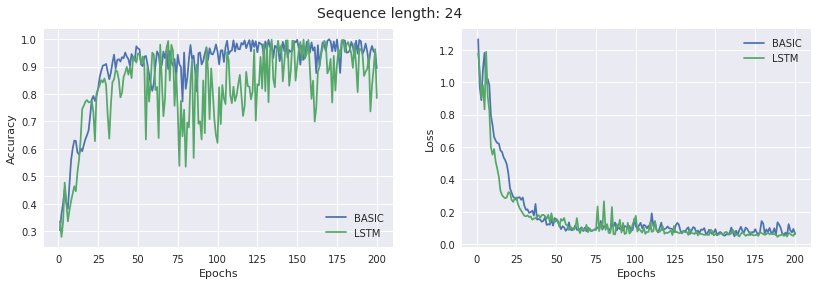

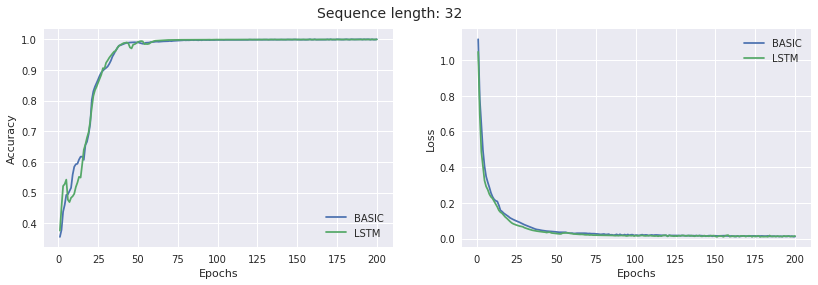

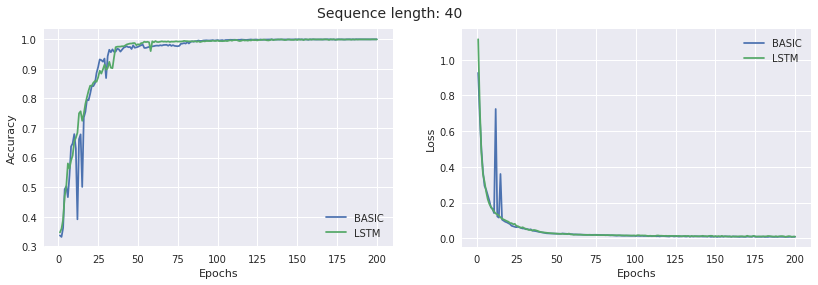

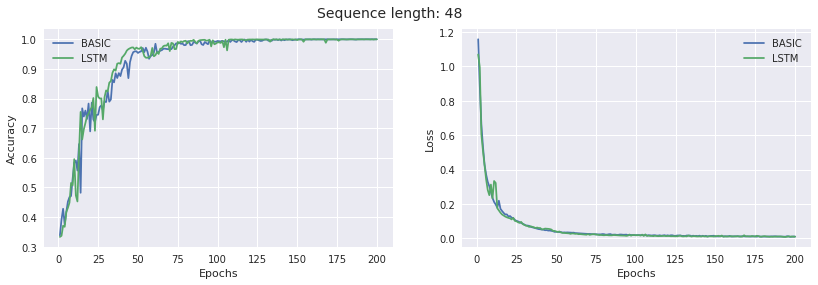

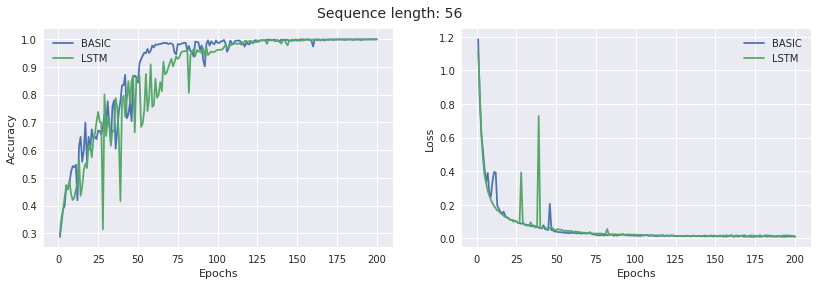

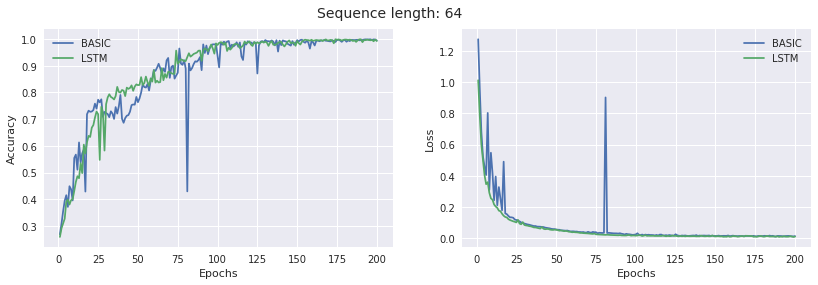

In [133]:
plot(24, plots_data)
plot(32, plots_data)
plot(40, plots_data)
plot(48, plots_data)
plot(56, plots_data)
plot(64, plots_data)

In [106]:
!ls results/

models-fix_len	       n_varlen		y_varlen
models-fix_len.tar.gz  n_varlen.tar.gz	y_varlen.tar.gz


In [107]:
var_logs = ['./results/n_varlen/plot_data.log', './results/y_varlen/plot_data.log']
var_data = [load_plot_data(fn) for fn in var_logs]

In [111]:
def var_plot(n_epochs, n_data, y_epochs, y_data):            
    plt.subplots(1, 2, figsize=(12,4))
    plt.suptitle("Variable length $l \in \{16, 18, ..., 62, 64\}$", fontsize=14)
    plt.subplot(121)
    plt.plot(n_epochs, n_data[1], label="BASIC");
    plt.plot(y_epochs, y_data[1], label="LSTM");
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(122)
    plt.plot(n_epochs, n_data[0], label="BASIC"), plt.plot(y_epochs, y_data[0], label="LSTM");
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()

    plt.subplots_adjust(left=0.1, wspace=0.2, top=0.9)

    plt.savefig("imgs/var-len.png")

In [113]:
n_var_data = var_data[0]
y_var_data = var_data[1]

In [124]:
n_epochs = n_var_data[:,0].astype(np.uint8)
y_epochs = y_var_data[:,0].astype(np.uint8)
n_data = n_var_data[:,1],n_var_data[:,2]
y_data = y_var_data[:,1], y_var_data[:,2]

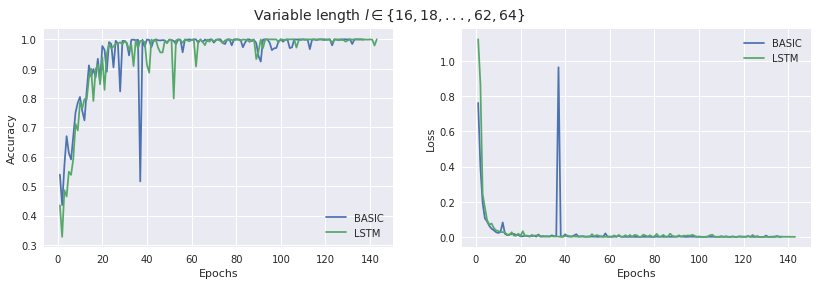

In [125]:
var_plot(n_epochs, n_data, y_epochs, y_data)